# Used Car Price Prediction

Importing Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df=pd.read_csv('used_cars.csv')
df.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
384,Mercedes-Benz,Sprinter 3500 High Roof,2017,"124,630 mi.",Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,Black,Black,None reported,Yes,"$75,000"
80,Land,Rover Discovery Sport SE R-Dynamic,2020,"21,240 mi.",Gasoline,2.0 Liter,Automatic,White,Black,None reported,NaN,"$37,998"
3177,Mazda,CX-9 Signature,2018,"19,500 mi.",Gasoline,227.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Brown,None reported,Yes,"$32,250"
3185,Mitsubishi,Lancer Evolution MR,2006,"128,000 mi.",Gasoline,286.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Black,None reported,Yes,"$37,999"
2225,BMW,M4 Competition xDrive,2022,"3,213 mi.",Gasoline,503.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Black,Red,None reported,Yes,"$89,995"


In [207]:
# checking dtype of columns

print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None
(4009, 12)


Checking Null Values

In [208]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

### What to do with each Column
1. Brand: Apply Target Encoding
2. model: drop it
3. model_year: can do feature extraction
4. mileage: clean it 
5. fuel type: drop useless categories
6. engine: feature engineer it to get different attributes
7. transmission:Convert it to manual/automatic
8. ext_col: Group rare colors into 'other' category
9. int_col: Group rare colors into 'other' category
10. accident: Make it boolean
11. clean_title: drop it
12. Price: clean it

Price

In [209]:
df['price']=df['price'].apply(lambda x:x.replace('$','').replace(',', ''))
df['price']=df['price'].astype('int')

Mileage

In [210]:
df['milage']=df['milage'].apply(lambda x:x.replace(',', '').replace('mi.',''))
df['milage']=df['milage'].astype('int')

Brand

In [211]:
# Checking No of categories 
df['brand'].nunique()

57

There are 57 so best is to apply Target Encoding or mean encoding

Model

In [212]:
df['model'].nunique()

1898

In [213]:
df.drop(columns='model',inplace=True)

Model Year

In [214]:
import datetime
current_year = datetime.datetime.now().year
df['car_age']=current_year-df['model_year']

Fuel Type

In [215]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [216]:
df=df[df['fuel_type']!='–']
df=df[df['fuel_type']!='not supported']

In [217]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64

Engine

In [218]:
df['engine'].nunique()

1143

Making Horsepower column

In [219]:
df['engine_HP']=df['engine'].str.extract(r'(\d+\.?\d*)HP').astype('float')

In [220]:
df.sample(5)

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_HP
2798,Lexus,2013,99524,Gasoline,386.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,24900,13,386.0
740,BMW,2018,40989,Gasoline,320.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Black,Gold,None reported,Yes,35000,8,320.0
1454,Chrysler,2005,24847,Gasoline,3.2L V6 18V MPFI SOHC,5-Speed Automatic,White,Dark Gray,None reported,Yes,13046,21,NaN
521,BMW,2013,79341,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Gold,Brown,None reported,Yes,16800,13,445.0
2392,BMW,2020,4880,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN,57998,6,NaN


Displacement

In [221]:
df['displacement']=df['engine'].str.extract(r'(\d+\.?\d*)L | Liter').astype('float')

Cylinder

In [222]:
# Leave it for now

In [223]:
df.sample(5)

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_HP,displacement
1096,Acura,2019,25779,Gasoline,3.5L V6 24V GDI SOHC,9-Speed Automatic,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,30999,7,NaN,3.5
2625,Ford,2016,110450,Gasoline,231.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Silver,Brown,None reported,Yes,11000,10,231.0,2.0
1442,BMW,2015,34455,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Gray,Beige,None reported,Yes,28000,11,300.0,3.0
774,Cadillac,2013,105000,Gasoline,318.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,12000,13,318.0,3.6
2535,Mercedes-Benz,2005,153460,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,Gold,Gold,At least 1 accident or damage reported,Yes,5800,21,302.0,5.0


Turbo

In [224]:
df['is_Turbo']=df['engine'].str.contains('Turbo',case=False,na=False)

df.sample(5)

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_HP,displacement,is_Turbo
135,Land,2006,153843,Gasoline,300.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Red,Beige,At least 1 accident or damage reported,Yes,9950,20,300.0,4.4,False
738,Aston,2010,25991,Gasoline,420.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Silver,Black,None reported,Yes,69995,16,420.0,4.7,False
2411,BMW,2017,105100,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,23300,9,300.0,3.0,False
964,Kia,2023,5500,Gasoline,291.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,40000,3,291.0,3.8,False
1584,Jaguar,2012,38383,Gasoline,510.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,None reported,Yes,36949,14,510.0,5.0,False


Dropping Engine

In [225]:
df.drop(columns='engine',inplace=True)

Transmission

In [226]:
df['transmission'].value_counts()

transmission
A/T                                  1013
8-Speed A/T                           405
Transmission w/Dual Shift Mode        396
6-Speed A/T                           362
6-Speed M/T                           243
                                     ... 
10-Speed Automatic with Overdrive       1
9-Speed Automatic with Auto-Shift       1
SCHEDULED FOR OR IN PRODUCTION          1
6 Speed Mt                              1
8-Speed Manual                          1
Name: count, Length: 62, dtype: int64

In [227]:
df['automatic']=df['transmission'].str.contains(r'A/T|Automatic',case=False,na=False)

# Here we are doing mapping

df['transmission'] = df['automatic'].map({True: 'Automatic', False: 'Manual'})

df.drop(columns='automatic',inplace=True)

In [228]:
df.sample(5)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_HP,displacement,is_Turbo
665,Chevrolet,2017,195361,Gasoline,Manual,Black,Black,At least 1 accident or damage reported,Yes,26000,9,355.0,5.3,False
1883,Ford,2018,18515,Gasoline,Manual,White,Black,At least 1 accident or damage reported,Yes,60867,8,526.0,5.2,False
1418,Subaru,2015,91000,Gasoline,Manual,Red,Black,At least 1 accident or damage reported,Yes,19000,11,268.0,2.0,False
1423,Audi,2015,73000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,17200,11,220.0,2.0,False
1218,BMW,2015,72000,Gasoline,Manual,Black,Brown,At least 1 accident or damage reported,Yes,26500,11,445.0,4.4,False


Exterior Color

In [229]:
count=(df['ext_col'].value_counts())
rare_color=count[count<100].index
df['ext_col']=df['ext_col'].replace(rare_color, 'Others')

Interior Color

In [230]:
count=df['int_col'].value_counts()
rare_color=count[count<100].index
df['int_col']=df['int_col'].replace(rare_color, 'Others')
df=df[df['int_col']!='–']

Accident

In [231]:
df['accident']=df['accident'].map({'At least 1 accident or damage reported':True, 'None reported':False})

Clean Title 

In [232]:
df.drop(columns=['clean_title'],inplace=True)

Applying Train Test Split

In [233]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='price',axis=1)

y=np.log1p(df['price'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [234]:
df.sample(3)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,car_age,engine_HP,displacement,is_Turbo
2483,Lexus,2021,26800,Gasoline,Automatic,Black,Red,False,44000,5,311.0,3.5,False
709,MINI,2014,79000,Gasoline,Manual,White,Black,False,17000,12,181.0,1.6,False
766,Volkswagen,2015,85385,Gasoline,Manual,Gray,Black,False,15550,11,210.0,2.0,False


Handling Missing Values

In [235]:
df.isnull().sum()

brand             0
model_year        0
milage            0
fuel_type       167
transmission      0
ext_col           0
int_col           0
accident        107
price             0
car_age           0
engine_HP       725
displacement    316
is_Turbo          0
dtype: int64

Using Pipeline to apply Target Encoding on Brand and Linear Regression model

In [236]:
# !pip install category_encoders

In [237]:
X_train.sample(2)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,car_age,engine_HP,displacement,is_Turbo
2727,Chevrolet,2022,21400,Diesel,Automatic,Gray,Black,False,4,277.0,3.0,False
1012,Lexus,2016,51335,Gasoline,Automatic,Silver,Black,True,10,268.0,3.5,False


In [238]:
X_train.isnull().sum()

brand             0
model_year        0
milage            0
fuel_type       131
transmission      0
ext_col           0
int_col           0
accident         91
car_age           0
engine_HP       583
displacement    250
is_Turbo          0
dtype: int64

In [239]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [241]:
X_train['accident']

122     False
3997    False
1629    False
2037    False
1875    False
        ...  
3769    False
1682     True
2657    False
2692    False
3387    False
Name: accident, Length: 3066, dtype: bool

In [242]:
X_train.head(2)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,car_age,engine_HP,displacement,is_Turbo
122,Rivian,2023,2500,NaN,Automatic,Others,White,False,3,835.0,NaN,False
3997,Chevrolet,2018,71312,Gasoline,Automatic,Black,Black,False,8,305.0,3.6,False


In [243]:
fuel_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

df['accident'] = df['accident'].map({True: 1, False: 0})


num_features = ['milage','car_age','engine_HP','displacement','accident']
cat_features = ['fuel_type','transmission','ext_col','int_col']

col = ColumnTransformer(
    transformers=[
        ('brand_te',
         ce.TargetEncoder(
             cols=['brand'],
             handle_unknown='value',
             handle_missing='value'
         ),
         ['brand']),

        ('num',
         SimpleImputer(strategy='median'),
         num_features),

        ('cat',
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('ohe', OneHotEncoder(handle_unknown='ignore'))
         ]),
         cat_features)
    ]
)


Linear Regression Pipeline

In [244]:
# pipe=Pipeline(
#     steps=[
#     ('pre_process',col),
#     ('LR',LinearRegression()    
#     )]
# )
# pipe.fit(X_train,y_train)
# y_pred_log=pipe.predict(X_test)
# y_pred=np.expm1(y_pred_log)


Polynomial Regression Pipeline

In [245]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression

# pipe = Pipeline([
#     ('pre_process',col),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#     ('lr', LinearRegression())
# ])


# pipe.fit(X_train,y_train)
# y_pred_log=pipe.predict(X_test)
# y_pred=np.expm1(y_pred_log)

Random Forest Regressor (RF)

In [246]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error

# # Pipeline
# pipe = Pipeline([
#     ('pre_process', col),                     
#     ('rf', RandomForestRegressor(
#         n_estimators=200, 
#         max_depth=None, 
#         random_state=42,
#         n_jobs=-1
#     ))
# ])

# # Fit
# pipe.fit(X_train, y_train)

# # Predict
# y_pred_log = pipe.predict(X_test)
# y_pred = np.expm1(y_pred_log)




GradientBoostingRegressor

In [247]:
from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline([
    ('pre_process', col),
    ('gb', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

# Fit
pipe.fit(X_train, y_train)

# Predict
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)



Evaluation Metrics

In [248]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

r2 = r2_score(y_test_price, y_pred_price)
print("R² Score:", r2)




scores = cross_val_score(
    pipe, X, y, cv=5, scoring='r2'
)
print(f'Cross Val Score for R2 {scores.mean()}')



y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

mape = mean_absolute_percentage_error(y_test_price, y_pred_price)
print("MAPE:", mape)


R² Score: 0.7271785716158408
Cross Val Score for R2 0.8752062578439661
MAPE: 0.21877428132790222


Plot comparison of 4 models

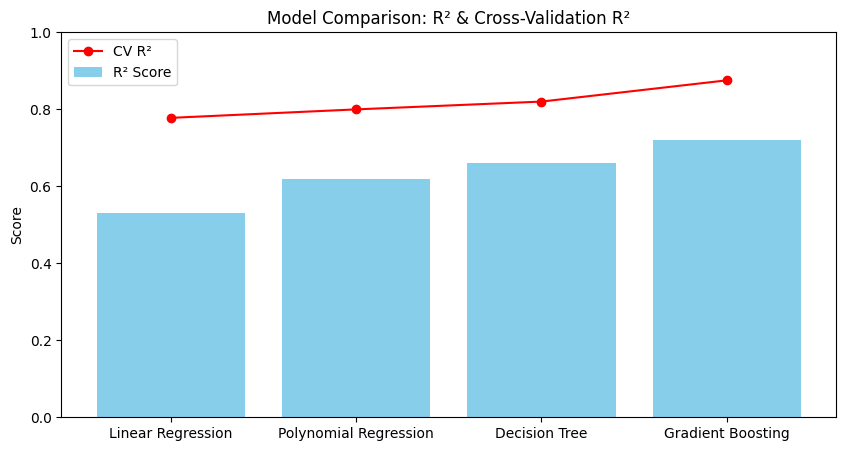

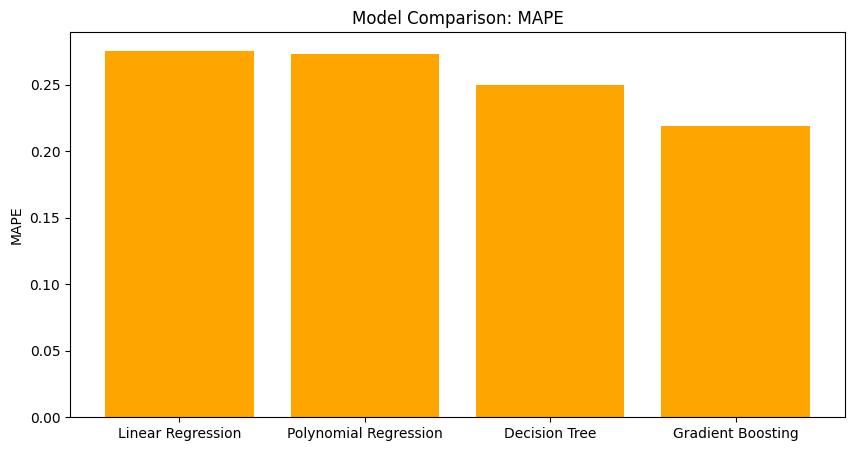

In [249]:
models = ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Gradient Boosting']
r2_scores = [0.53, 0.62, 0.66, 0.72]
cv_scores = [0.7777, 0.7997, 0.8200, 0.8752]
mape_scores = [0.2757, 0.2735, 0.2500, 0.2187]

# Plot R² Scores
plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color='skyblue', label='R² Score')
plt.plot(models, cv_scores, marker='o', color='red', label='CV R²')
plt.title('Model Comparison: R² & Cross-Validation R²')
plt.ylabel('Score')
plt.ylim(0,1)
plt.legend()
plt.show()

# Plot MAPE
plt.figure(figsize=(10,5))
plt.bar(models, mape_scores, color='orange')
plt.title('Model Comparison: MAPE')
plt.ylabel('MAPE')
plt.show()


### Comparison of Results
1. Linear Regression <br>
    R² Score: 0.53<br>
    Cross Val Score for R2 0.77769<br>
    MAPE: 0.2757 <br>
2. Polynomial Regression <br>
   R² Score: 0.62 <br>
    Cross Val Score for R2 0.79969 <br>
    MAPE: 0.2735


3. Random Forest Regressor <br>
    R² Score: 0.71<br>
    Cross Val Score for R2 0.84956<br>
    MAPE: 0.2402

4. Gradient Boost Regressor<br>
    R² Score: 0.72<br>
    Cross Val Score for R2 0.8752<br>
    MAPE: 0.2187


Saving Model

In [250]:
import joblib
joblib.dump(pipe,'car_price_prediction.pkl')
print('Model Saved Successfully')

Model Saved Successfully
